# Time Series: Weather Data

Data from https://www.ecad.eu/

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [112]:
filepath = "../data/ECA_blended_custom/TG_STAID002759.txt"

The file header states
* "MISSING VALUE CODE IS -9999"
* "mean temperature in 0.1 °C"

In [113]:
df = pd.read_csv(filepath
                 ,skiprows = 19 # skip info lines above csv part
                 ,skipinitialspace = True # to get clean column names
                 ,na_values = [-9999])

In [114]:
# datetime format string doc: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y%m%d")

In [115]:
df.set_index('DATE', inplace=True)

In [116]:
df['TG'] = 0.1 * df['TG']

In [117]:
df.head()

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,2.2,0
1876-01-02,127488,2.5,0
1876-01-03,127488,0.3,0
1876-01-04,127488,-5.8,0
1876-01-05,127488,-9.8,0


## Explore
*https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#indexing*

### Last year of the data set

<AxesSubplot:xlabel='DATE'>

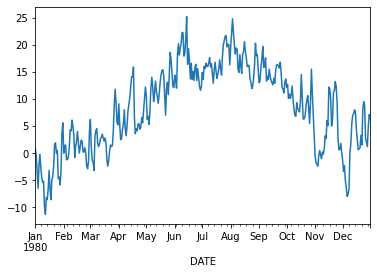

In [118]:
df.loc['1980','TG'].plot()

### All years in one plot

*https://atedstone.github.io/pandas-plot-seasons-time-series/*

In [119]:
df['day_of_year'] = df.index.dayofyear
df['year'] = df.index.year
piv = pd.pivot(df, index='day_of_year', columns='year', values='TG')

<AxesSubplot:xlabel='day_of_year'>

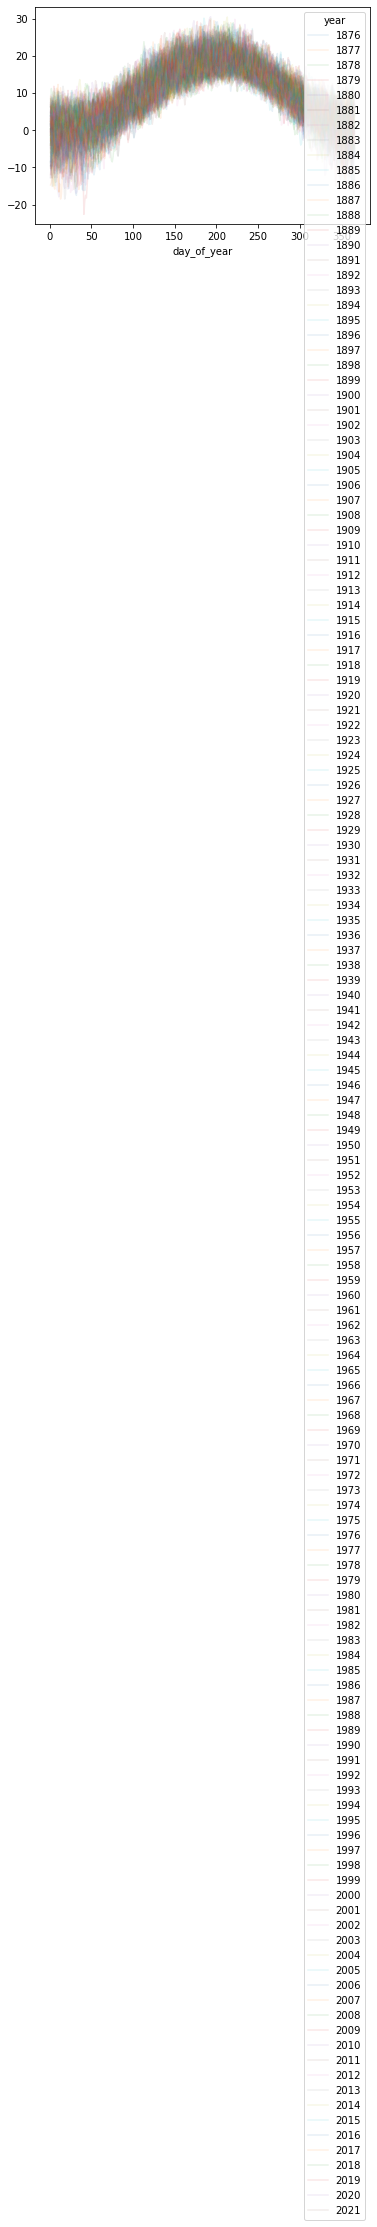

In [120]:
piv.plot(alpha=0.1)